## Лабораторна робота 6. **Unsupervised Learning**

Оцінювання даної роботи буде ураховувати якість Ваших висновків та візуалізацій. При наявності ЛИШЕ коду та візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.  

Більшість поставлених в цій лабораторній роботі задач в майбутньому буде ставитись Вами самойстійно!

Під час виконання Вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

Оформлення коментарів повинно проводитися в текстових комірках ноутбука з використанням синтаксису [LaTeX](https://en.wikibooks.org/wiki/LaTeX/Basics) для оформлення тексту та формул. 

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

## Кластерування  

В цій лабораторній роботі Ви будете вирішувати задачу класифікації БЕЗ вчителя. 

In [2]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline 

import os
import warnings


warnings.filterwarnings('ignore')

**Завдання 0** 

Для початку необхідно завантажити вибірку `Mall_Customers` і перейменувати атрибути `Annual Income (k$)` в `Income`,`Spending Score (1-100)` в `SpendingScore`

In [7]:
customer_set = pd.read_csv('Mall_Customers.csv')
customer_set.rename(columns={'Annual Income (k$)': 'Income', 'Spending Score (1-100)': 'SpendingScore'}, inplace=True)
print(customer_set)

     CustomerID  Gender  Age  Income  SpendingScore
0             1    Male   19      15             39
1             2    Male   21      15             81
2             3  Female   20      16              6
3             4  Female   23      16             77
4             5  Female   31      17             40
..          ...     ...  ...     ...            ...
195         196  Female   35     120             79
196         197  Female   45     126             28
197         198    Male   32     126             74
198         199    Male   32     137             18
199         200    Male   30     137             83

[200 rows x 5 columns]


**Завдання 1** 

Підготовка даних до опрацювання

* подивитись які атрибути містить вибірка; 
* вивести розмірність датасету;
* вивести основну статистичну інформацію по числовим змінним;  
* перевірити на наявність `NaN`.   

In [8]:
print("Dataset attributes:")
print(customer_set.columns)

print("\nDataset dimensionality:")
print(customer_set.shape)

print("\nBasic statistical information for numerical variables:")
print(customer_set.describe())

print("\nChecking for NaN presence:")
print(customer_set.isna().sum())

Dataset attributes:
Index(['CustomerID', 'Gender', 'Age', 'Income', 'SpendingScore'], dtype='object')

Dataset dimensionality:
(200, 5)

Basic statistical information for numerical variables:
       CustomerID         Age      Income  SpendingScore
count  200.000000  200.000000  200.000000     200.000000
mean   100.500000   38.850000   60.560000      50.200000
std     57.879185   13.969007   26.264721      25.823522
min      1.000000   18.000000   15.000000       1.000000
25%     50.750000   28.750000   41.500000      34.750000
50%    100.500000   36.000000   61.500000      50.000000
75%    150.250000   49.000000   78.000000      73.000000
max    200.000000   70.000000  137.000000      99.000000

Checking for NaN presence:
CustomerID       0
Gender           0
Age              0
Income           0
SpendingScore    0
dtype: int64


## EDA Mall Customers

**Завдання 2** 

Як Ви могли помітити по статистичній аналітиці вибірки вона містить змінну `CustomerID`. Ця змінна не впливає на аналіз даних тому її можна видалити.

In [ ]:
customer_set.drop('CustomerID', axis=1, inplace=True)

**Завдання 3** 

Побудувати діаграми розподілу по змінним `Age` , `Income` та `SpendingScore`

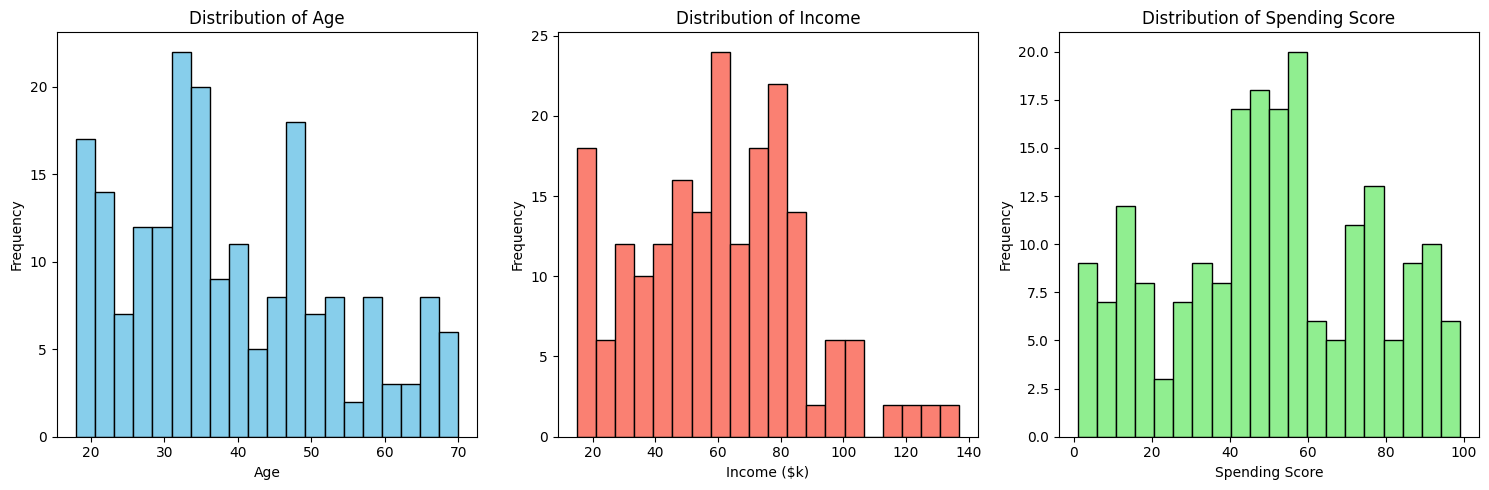

In [20]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
customer_set['Age'].plot(kind='hist', bins=20, ax=axes[0], color='skyblue', edgecolor='black')
axes[0].set_title('Distribution of Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

customer_set['Income'].plot(kind='hist', bins=20, ax=axes[1], color='salmon', edgecolor='black')
axes[1].set_title('Distribution of Income')
axes[1].set_xlabel('Income ($k)')
axes[1].set_ylabel('Frequency')

customer_set['SpendingScore'].plot(kind='hist', bins=20, ax=axes[2], color='lightgreen', edgecolor='black')
axes[2].set_title('Distribution of Spending Score')
axes[2].set_xlabel('Spending Score')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


**Завдання 4** 

Давайте подивимось на ці змінні `Age` , `Income` та `SpendingScore` відносно змінної `Gender`. 
* Побудуємо `pairplot` по всім змінним відностно змінної `Gender`:  
 
* Побудуємо `pairplot` використовуючи `sns.PairGrid` із заданими `(scatterplot)`, `(kdeplot)` та `(kdeplot, lw=1)` по відповідно правому верхньому куту, діагоналі і лівому нижньому кутут відносно змінної `Gender`:  
 

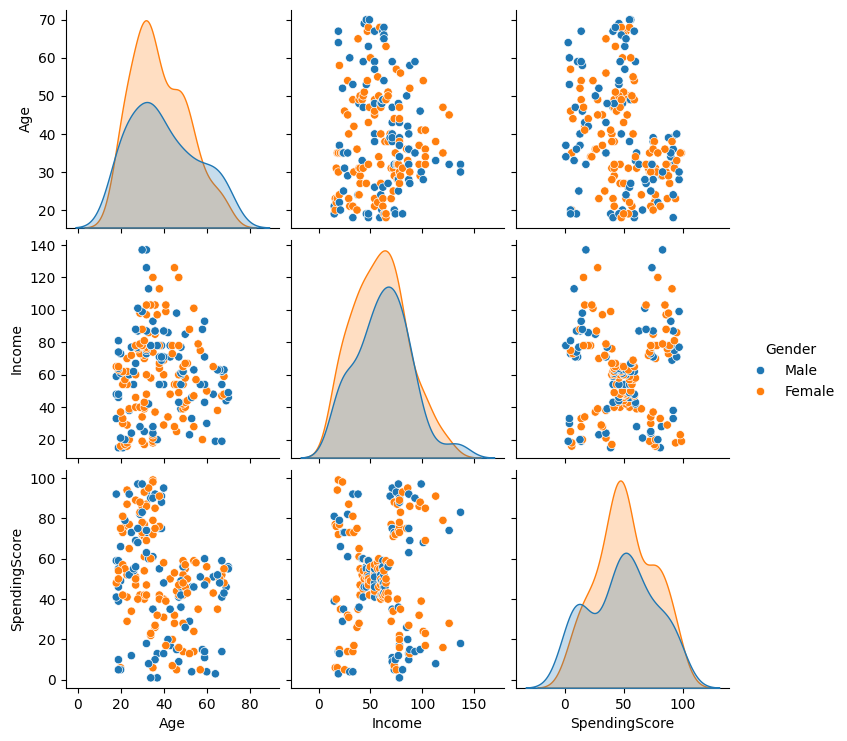

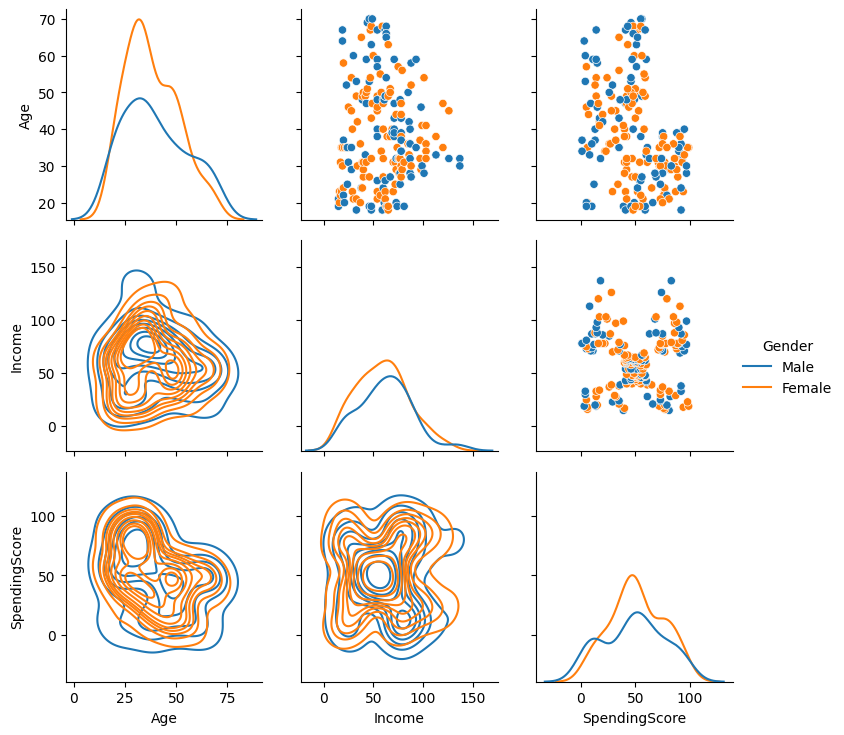

In [23]:
sns.pairplot(customer_set, hue='Gender')

g = sns.PairGrid(customer_set, hue='Gender')
g.map_upper(sns.scatterplot)
g.map_diag(sns.kdeplot)
g.map_lower(sns.kdeplot, lw=1)
g.add_legend()
plt.show()

**Висновки з 1-4 завдання (детальні)**

1.   По наших атрибутах датасет має 200 спостережень та 5 ознак. Середній вік клієнтів становить близько 38.85 років.Середній рівень доходу клієнтів складає приблизно 60.56 тис. а також немає відсутності даних у датасеті.
2.   Видалили зміну CustomerID
3. По діаграмі можемо побачити,що середній вік становить десь 35 років.Середній дохід в диапазоні 100-140. Кількість витрат становить приблизно 60.
4. Побудували діаграму pairplot по всім змінним відностно змінної Gender  
 

**Завдання 5** 

Проаналізувати змінну `Gender`:
* вивести співвідношення по статям;
* побудувати `countplot` по `Gender`;  
* побудувати `pie`по `Gender'.  

Gender distribution:
Gender
Female    112
Male       88
Name: count, dtype: int64


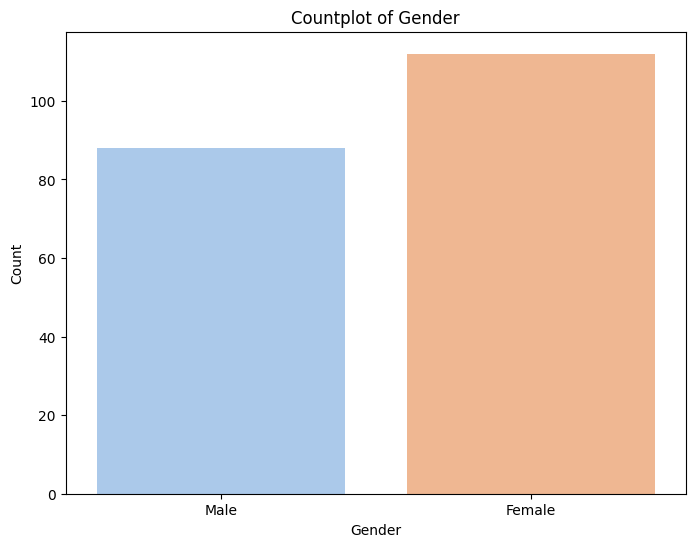

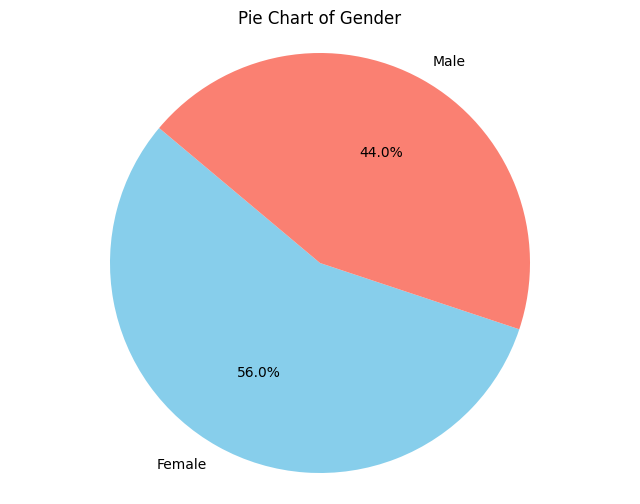

In [22]:
gender_counts = customer_set['Gender'].value_counts()
print("Gender distribution:")
print(gender_counts)

plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=customer_set, palette='pastel')
plt.title('Countplot of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'salmon'])
plt.title('Pie Chart of Gender')
plt.axis('equal')  
plt.show()


**Завдання 6** 

Побудувати гістограми [histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html) змінних `Age` та `Income` відносно змінної `Gender` з різними параметрами:
*  подивитись на скільки змінюється візуалізація при різних значеннях параметра `multiple`, наприклад `dodge` та `layer`.

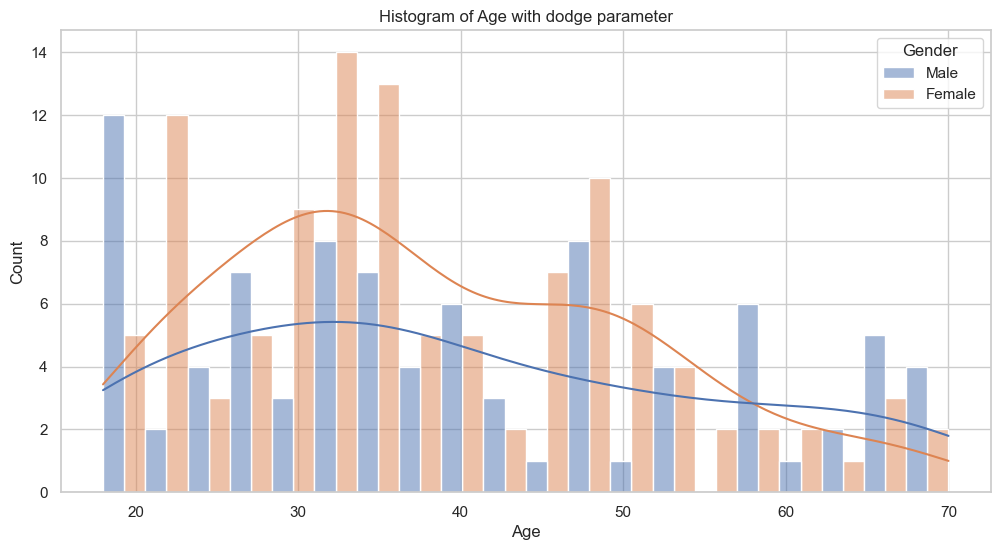

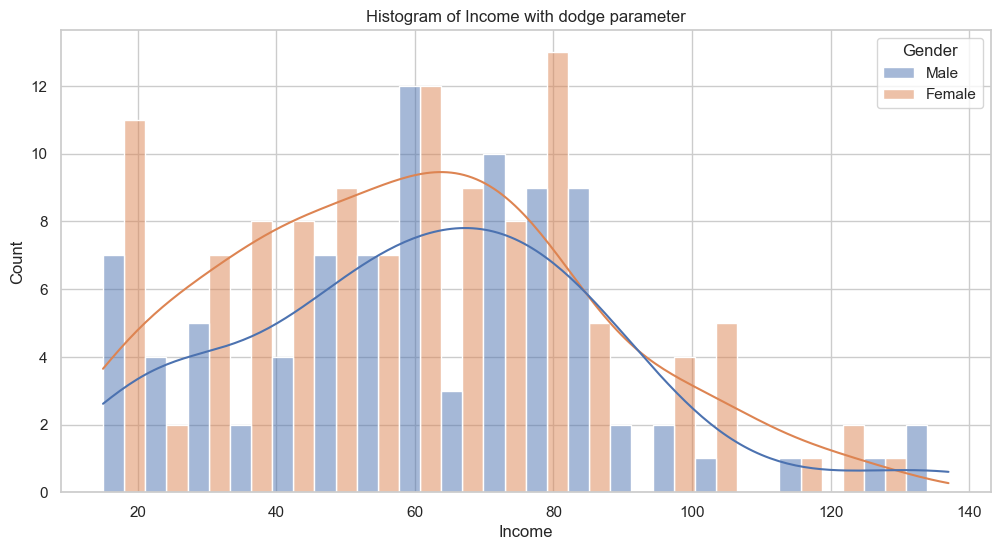

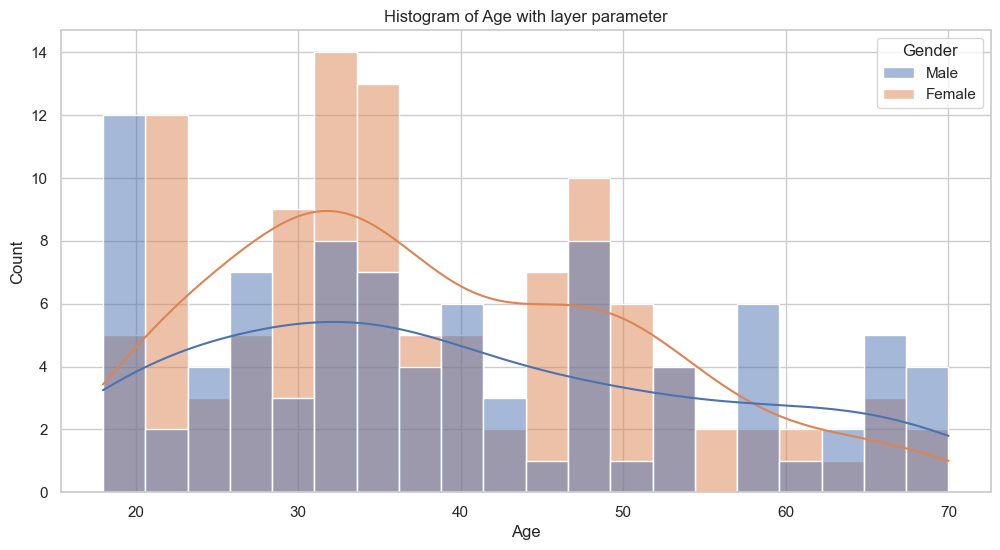

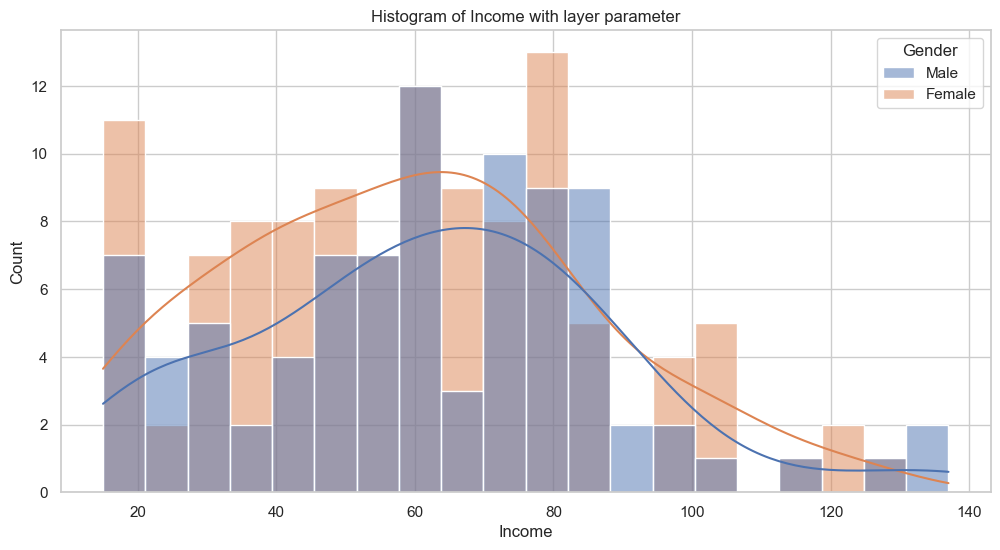

In [25]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.histplot(data=customer_set, x='Age', hue='Gender', multiple='dodge', bins=20, kde=True)
plt.title('Histogram of Age with dodge parameter')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(data=customer_set, x='Income', hue='Gender', multiple='dodge', bins=20, kde=True)
plt.title('Histogram of Income with dodge parameter')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(data=customer_set, x='Age', hue='Gender', multiple='layer', bins=20, kde=True)
plt.title('Histogram of Age with layer parameter')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(data=customer_set, x='Income', hue='Gender', multiple='layer', bins=20, kde=True)
plt.title('Histogram of Income with layer parameter')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()


**Завдання 7** 

Побудувати гістограми [histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html) змінної `SpendingScore` відносно змінної `Gender` з різними параметрами:  
* подивитись на скільки змінюється візуалізація при різних значеннях параметра `multiple`, наприклад `dodge` та `layer`. 



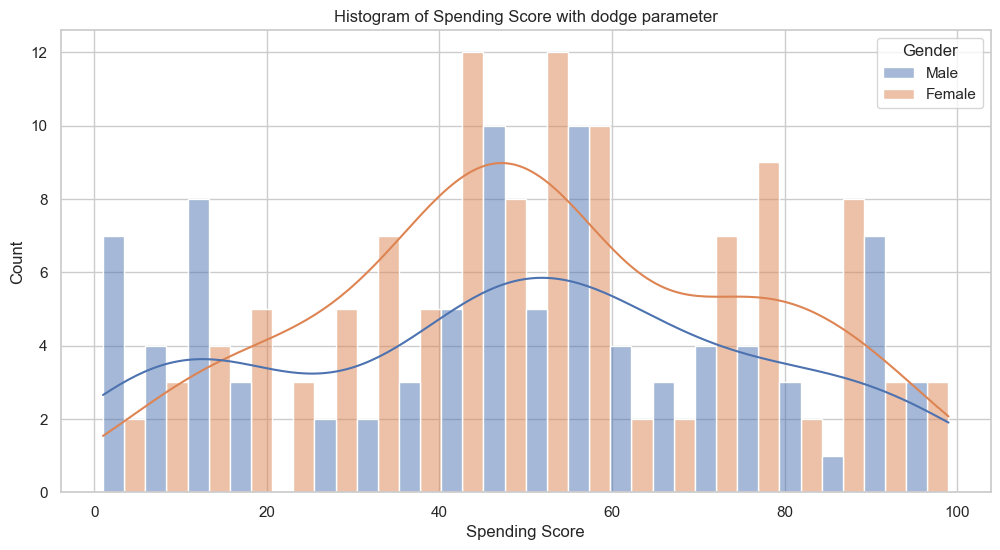

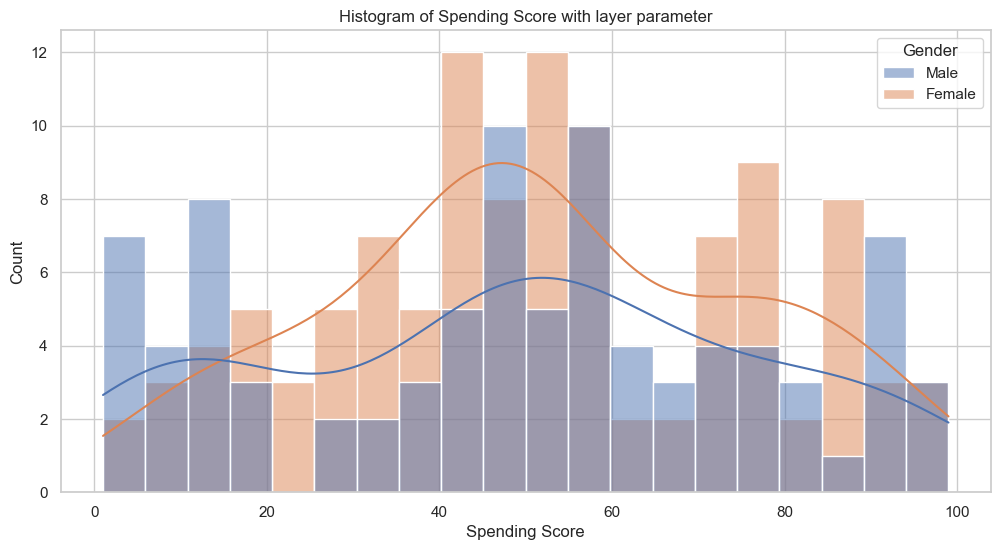

In [26]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.histplot(data=customer_set, x='SpendingScore', hue='Gender', multiple='dodge', bins=20, kde=True)
plt.title('Histogram of Spending Score with dodge parameter')
plt.xlabel('Spending Score')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(data=customer_set, x='SpendingScore', hue='Gender', multiple='layer', bins=20, kde=True)
plt.title('Histogram of Spending Score with layer parameter')
plt.xlabel('Spending Score')
plt.ylabel('Count')
plt.show()


**Завдання 8** 

Побудувати `boxplot` по змінній `SpendingScore` і подивитись як відрізняються витрати відностно змінної `Gender`. 

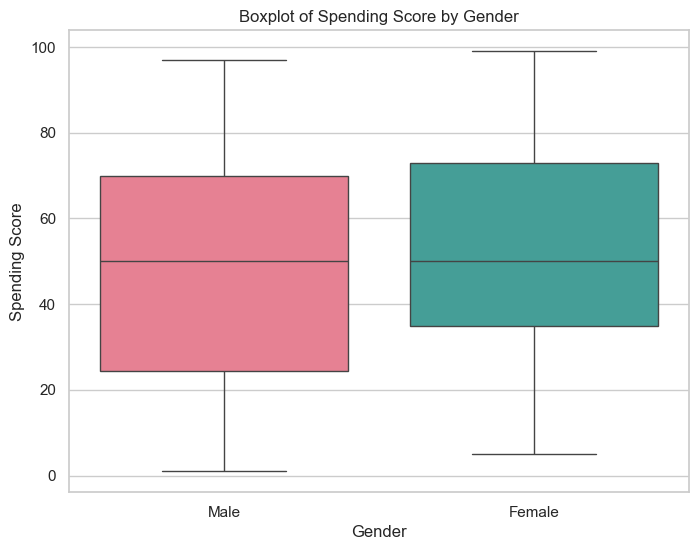

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='SpendingScore', data=customer_set, palette='husl')
plt.title('Boxplot of Spending Score by Gender')
plt.xlabel('Gender')
plt.ylabel('Spending Score')
plt.show()


**Висновки з завдання 5 - 8(детальні)**

5.  Співвідношенняя чоловіків становить 44% до 56% жінок
6.  Можна побачити що найбільший дохід чоловіків сіановить приблизно 60, а жінок 80
7. Можна побачити, що жінки витрачають більше
8. Можна побачити що витрати чоловіків є більшими 

## K-means Method ##

**Завдання 9** 

Як Ви могли помітити, вибірка, з якою ми працюємо, не містить ключової зміної з вірними мітками. Тому перед початком кластерування необхідно визначити (підібрати) оптимальну кількість кластерів на яке буде проведено розбиття. Для цього необхідно:
1. видалити змінну `Gender`, тому що ... **Чому?**;  
2. задати мінімальну та максимальну кількість кластерів самостійно;  
3. На прикладі алгоритму [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html), для ознайомлення з тим як працювати в умовах коли кількість кластерів невідома заздалегіть і немає вірних міток з позначками до якого кластеру відноситься спостереження пропонується використати метод [Elbow](https://coderoad.ru/19197715/Scikit-Learn-K-Means-Elbow-criterion) (додаткові джерела: [article_1](https://medium.com/analytics-vidhya/elbow-method-of-k-means-clustering-algorithm-a0c916adc540#:~:text=K%2Dmeans%20clustering%20is%20an,cluster%20with%20the%20nearest%20centroid.), [article_2](https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/))

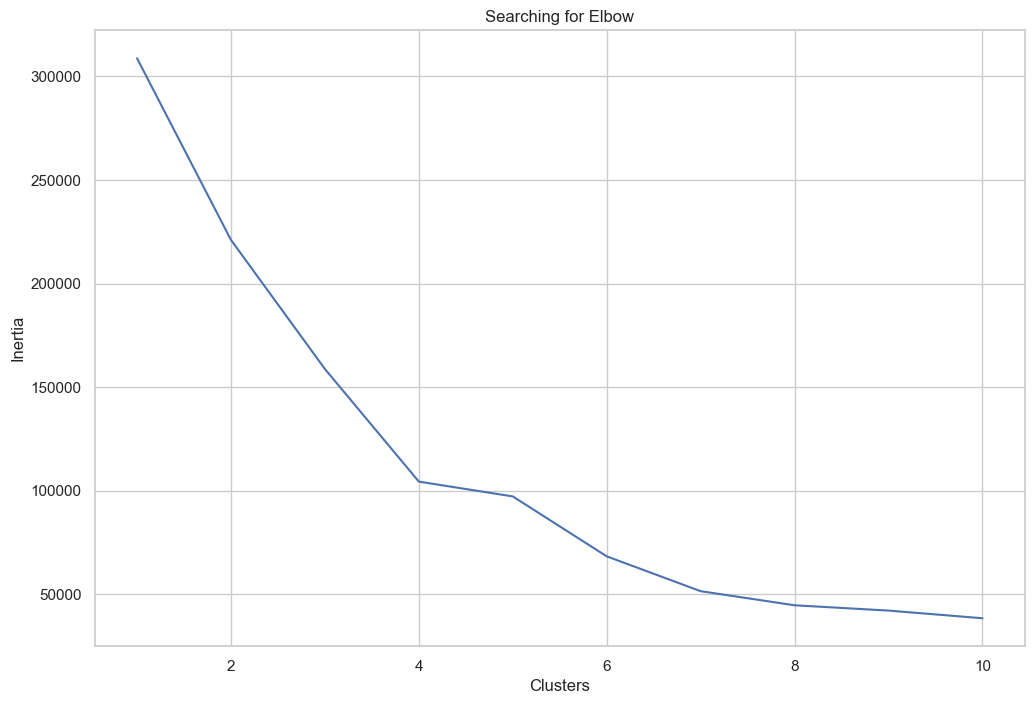

In [28]:
from sklearn.cluster import KMeans
import numpy as np

X = customer_set.drop(['Gender'], axis=1)

min_clusters = 1
max_clusters = 10

clusters = []
for i in range(min_clusters, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    clusters.append(kmeans.inertia_)
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(min_clusters, max_clusters + 1)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')
plt.show()


**Висновки з завдання 9 (детальні)** 

1.  На мою думку десь 4 кластери, так ми можемо поділити клієнтів на декілька різних груп, 


**Завдання 10** 

Зробити двовимірну візуалізацію кластеризації методу К-середніх на вибраних Вами двох різних кількостях кластерів використовуючи змінні `Income` та `SpendingScore`. 

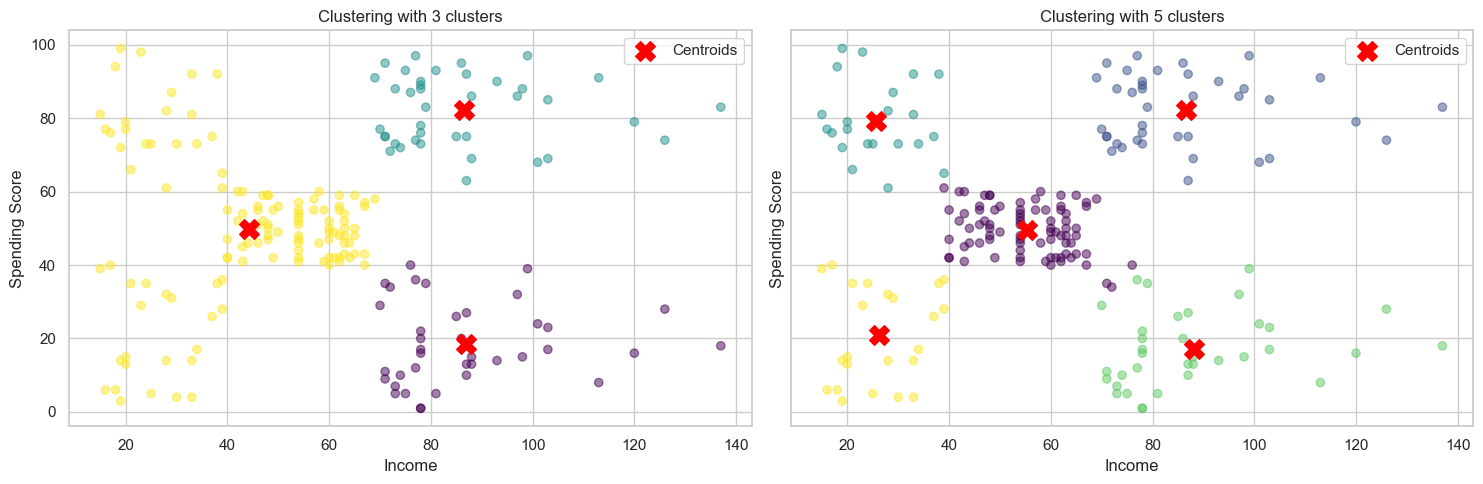

In [29]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
X = customer_set[['Income', 'SpendingScore']]
num_clusters = [3, 5]  
fig, axs = plt.subplots(1, len(num_clusters), figsize=(15, 5), sharey=True)
for i, k in enumerate(num_clusters):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    axs[i].scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis', alpha=0.5)
    axs[i].scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='red', label='Centroids')
    axs[i].set_title(f'Clustering with {k} clusters')
    axs[i].set_xlabel('Income')
    axs[i].set_ylabel('Spending Score')
    axs[i].legend()

plt.tight_layout()
plt.show()


**Завдання 11** 

Зробити візуалізацію кластеризації методу К-середніх на вибраних Вами двох різних кількостях кластерів використовуючи [scatter_3d](https://plotly.com/python/3d-scatter-plots/).

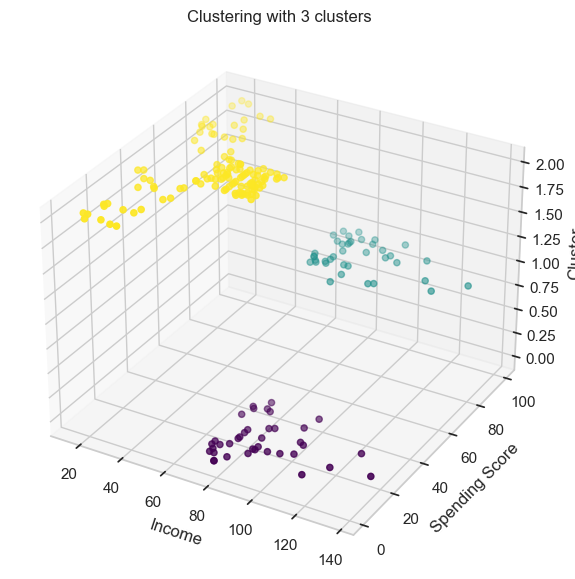

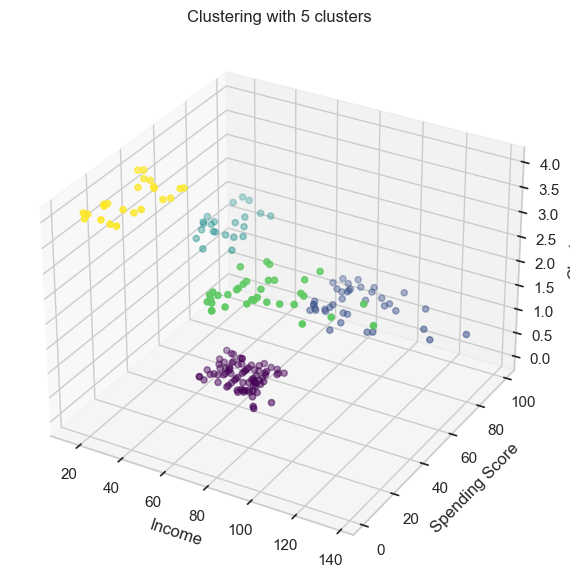

In [43]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

for k in num_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    X_clustered = X.copy()
    X_clustered['Cluster'] = labels
    
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X_clustered['Income'], X_clustered['SpendingScore'], X_clustered['Cluster'], c=X_clustered['Cluster'], cmap='viridis')
    ax.set_xlabel('Income')
    ax.set_ylabel('Spending Score')
    ax.set_zlabel('Cluster')
    ax.set_title(f'Clustering with {k} clusters')
    plt.show()




**Висновки з завдання 10 - 11 (детальні)** 

1. Оптимальна кількість кластерів це 4-5
2. Ми побудували 3д візуалізвцію з 3 та 5 кластерами 

## Agglomerative clustering ##

Розглянемо ще один підхід до кластеризації - [агломеративну ієрархічну кластеризацію](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

**Завдання 12** 

Кластеризуйте датасет за допомогою [агломеративної ієрархічнуої кластеризації](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

Мінімально необхідні параметри, що треба налаштувати:  
* `n_clusters`: параметр, який відповідає за кільксіть кластерів на яку буде проведено розбиття вибірки;  
* `linkage`: параметр зв’язку. Цей параметр визначає, яку відстань використовувати між наборами спостережень.
* перевірте як працює цей метод з різними параметрами `linkage`  
* після кожної зміни параметрів - візуалізувати розбиття на кластери

Розрахувати матрицю відстаней для нашого набору даних:
* за допомогою методу [hierarchy.linkage](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html) і матриці відстаней кластеризувати дані з різними значеннями параметра `method`
* за допомогою методу [hierarchy.dendrogram](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html) візуалізувати отримані результати кластеризації у вигляді дендрограм


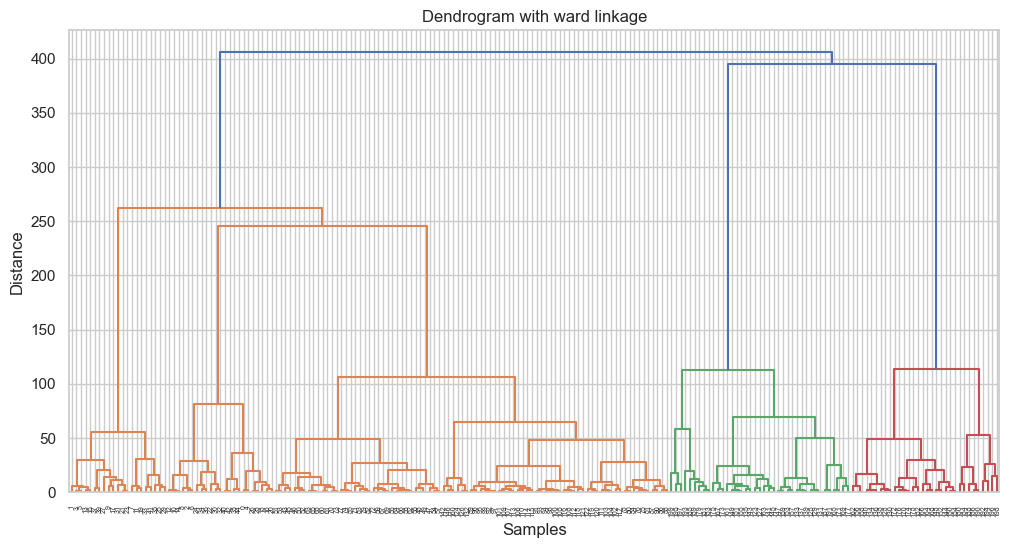

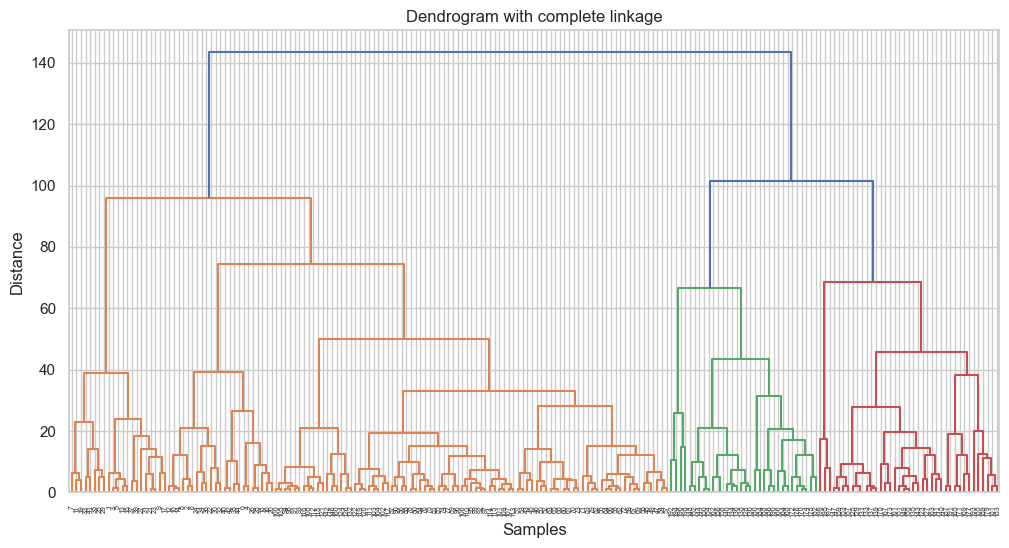

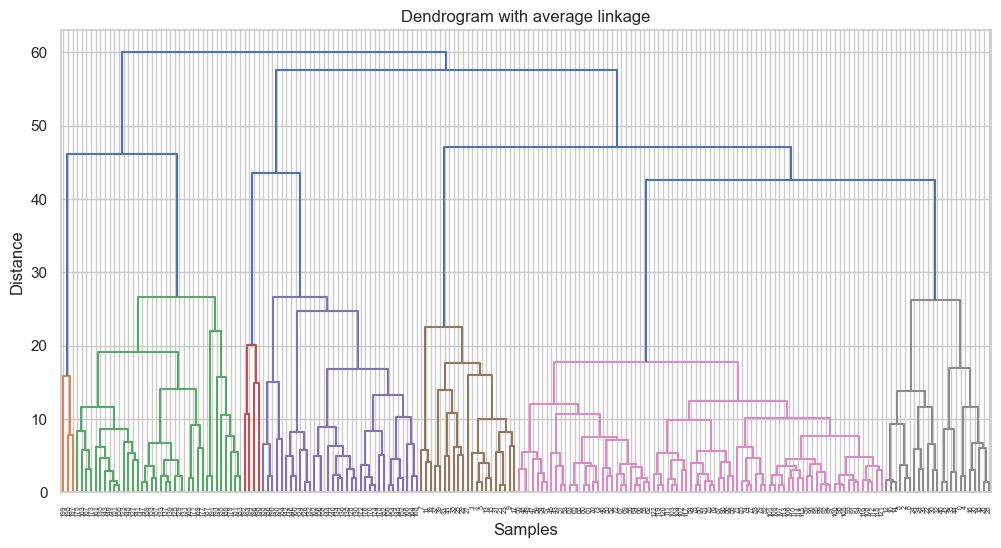

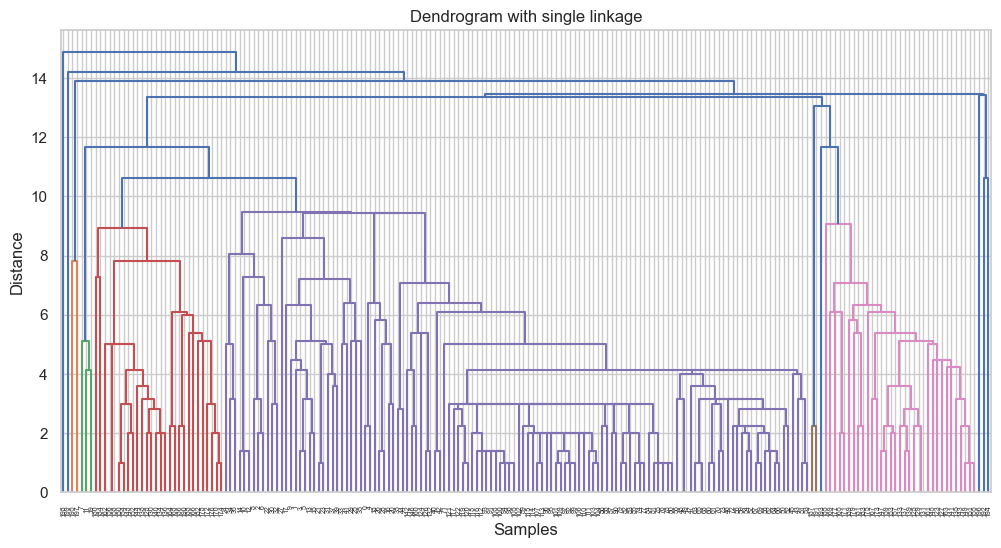

In [44]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy

for linkage_type in ['ward', 'complete', 'average', 'single']:
    clustering = AgglomerativeClustering(n_clusters=5, linkage=linkage_type)

    labels = clustering.fit_predict(X)
    Z = hierarchy.linkage(X, method=linkage_type)
    plt.figure(figsize=(12, 6))
    dn = hierarchy.dendrogram(Z)
    plt.title(f'Dendrogram with {linkage_type} linkage')
    plt.xlabel('Samples')
    plt.ylabel('Distance')
    plt.show()


**Висновки з завдання 12 (детальні)**

1. Ми відобразили розбиття на кластери за допомогою дендрограми з різними значеннями параметра method

**Завдання 13** 

А тепер зробимо порівняльний аналіз отриманих результатів кластеризації розглянутими методами:  
* В фінальних візуалізаціях треба використовувати **однакову** (на вашу думку оптимальну) кількість кластерів!!!  

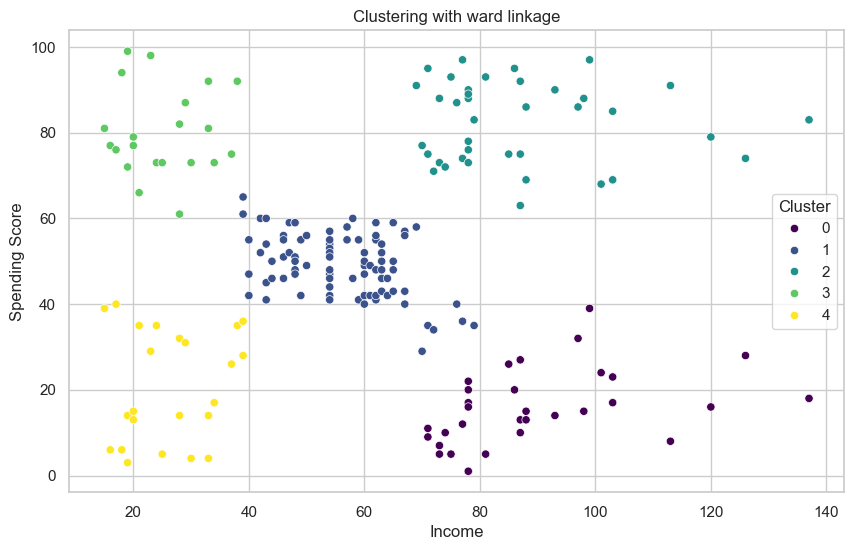

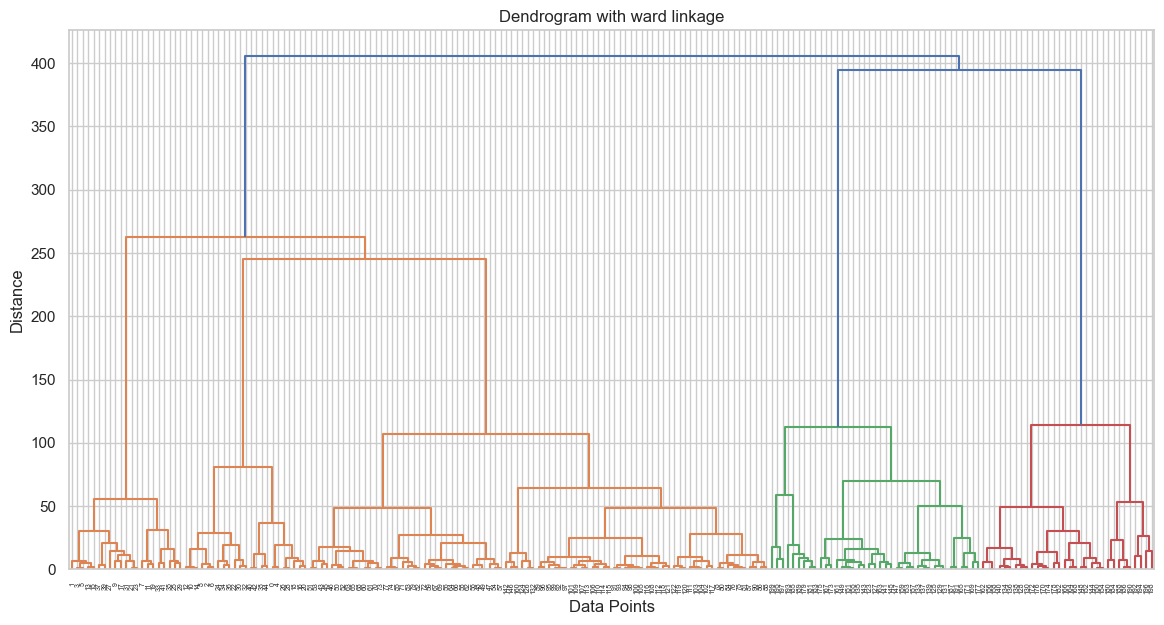

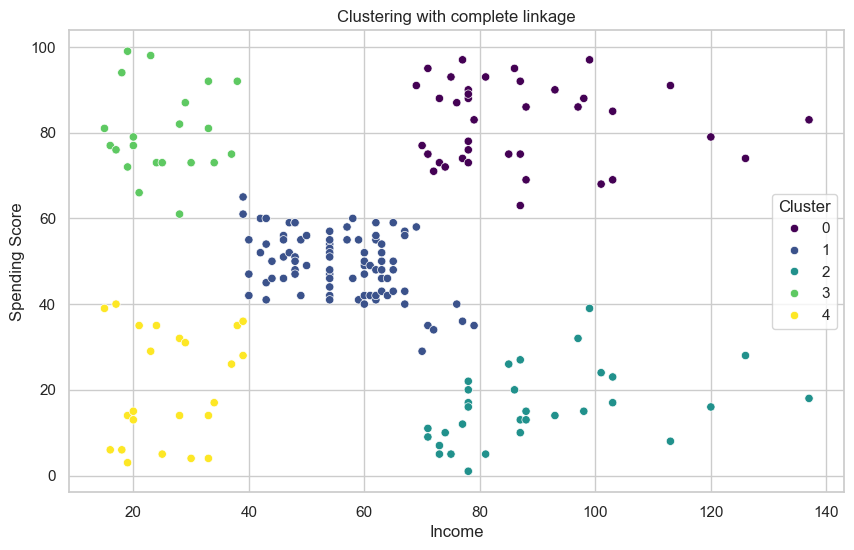

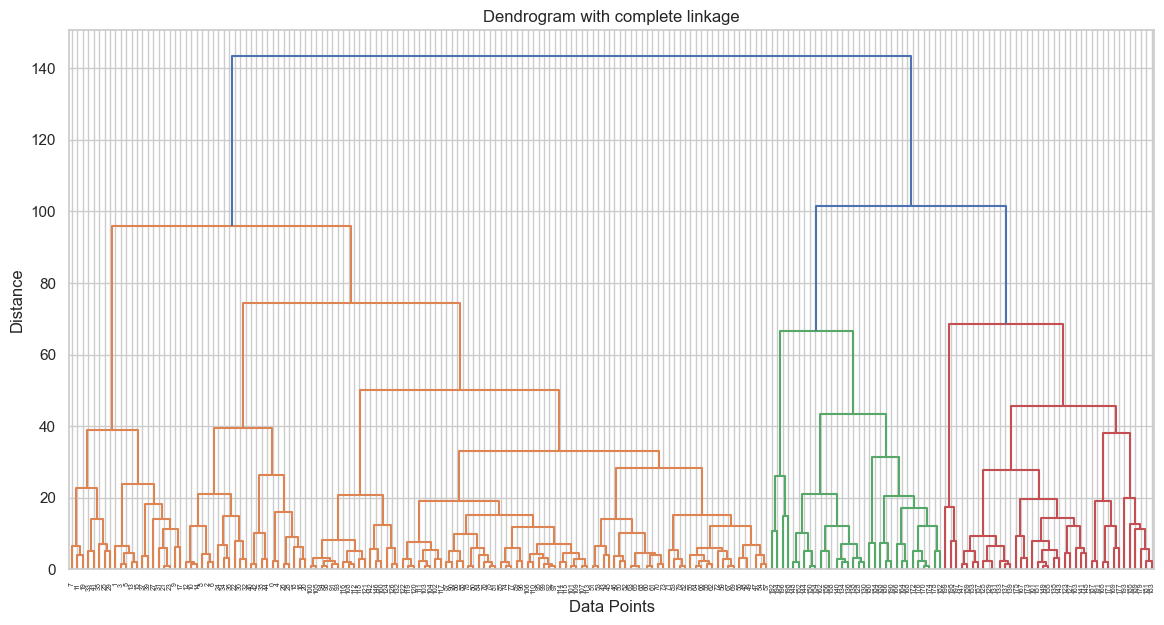

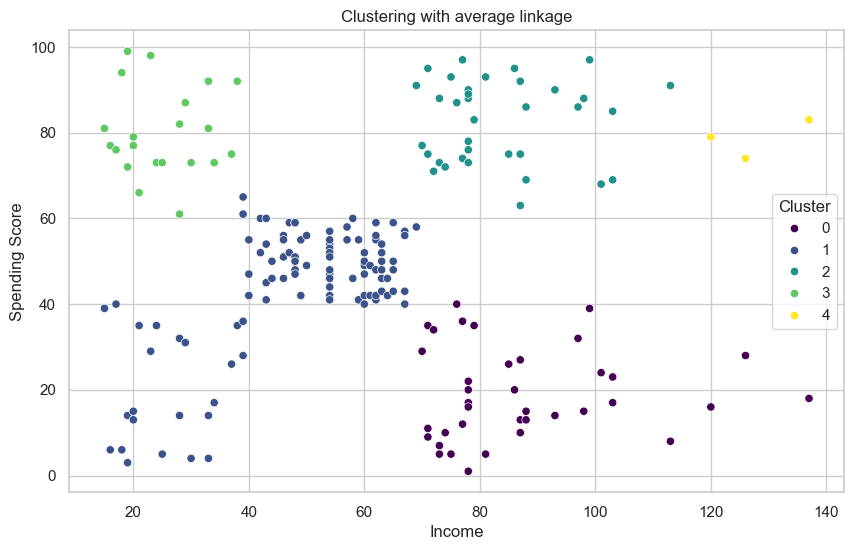

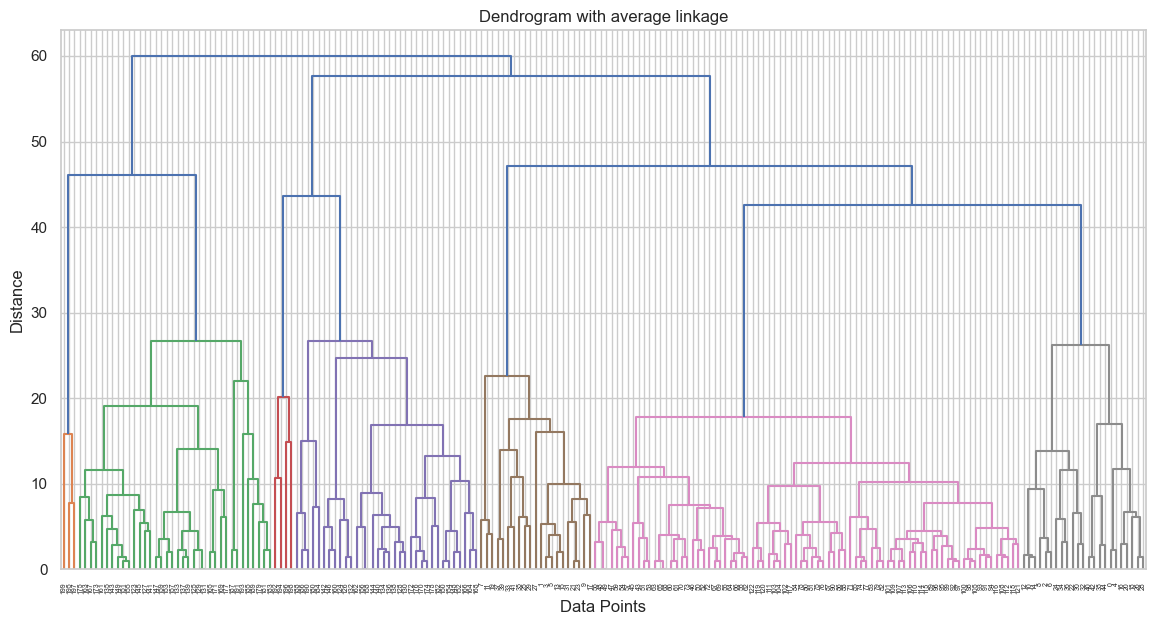

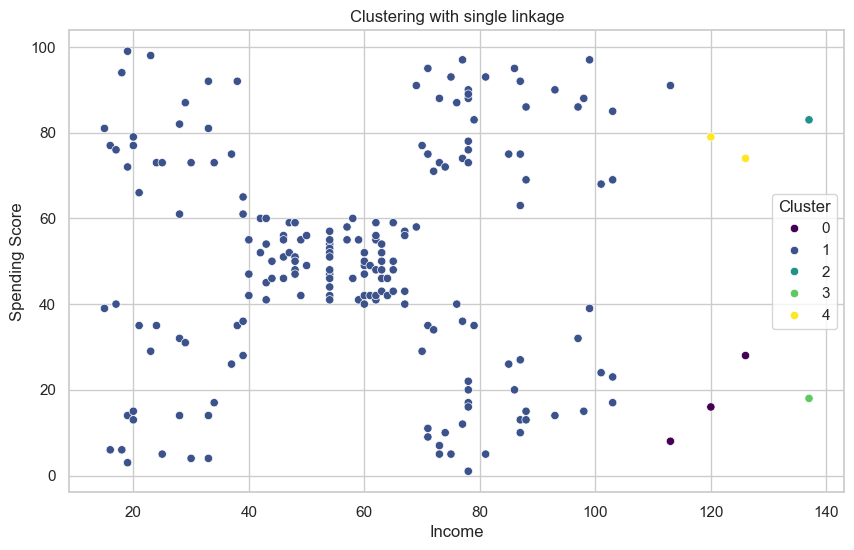

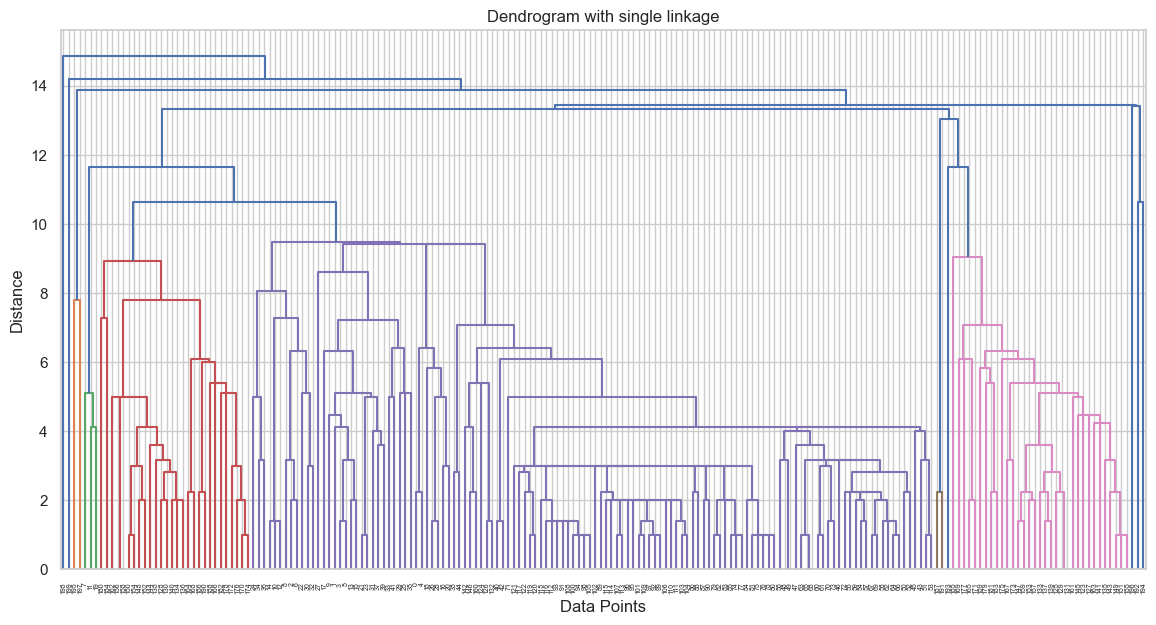

In [40]:
n_clusters = 5

for method in linkage_methods:
    
    clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage=method)
    cluster_labels = clustering.fit_predict(X)

    
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Income', y='SpendingScore', data=customer_set, hue=cluster_labels, palette='viridis')
    plt.title(f'Clustering with {method} linkage')
    plt.xlabel('Income')
    plt.ylabel('Spending Score')
    plt.legend(title='Cluster')
    plt.show()

    
    distance_matrix = hierarchy.distance.pdist(X)
    linkage = hierarchy.linkage(distance_matrix, method=method)
    plt.figure(figsize=(14, 7))
    hierarchy.dendrogram(linkage)
    plt.title(f'Dendrogram with {method} linkage')
    plt.xlabel('Data Points')
    plt.ylabel('Distance')
    plt.show()

**Висновки з завдання 13 (детальні)**

1. Ми вивели для порівняння порівняльний аналіз отриманих результатів з одинаковою кількістю кластерів